## Adam optimizer  - example 

* Data : housing.csv
* The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. 

* reference : https://www.kaggle.com/camnugent/california-housing-prices?select=housing.csv

1. Data load

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [34]:
data = pd.read_csv('/content/drive/MyDrive/패스트캠퍼스/딥러닝유치원/housing.csv')

In [35]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


2. 결측치 확인 및 제거


```
(1) data.info()를 통해, total_bedrooms의 데이터가 결측됨을 확인할 수 있다.

(2) 결측된 데이터 처리 방법
  -  결측된 데이터가 너무 많은 경우 해당 열 전체 삭제
  -  결측된 데이터가 일부일 경우 그럴듯한 값으로 대체하기
```



 - missingno를 사용하여 결측값 위치 시각화로 확인


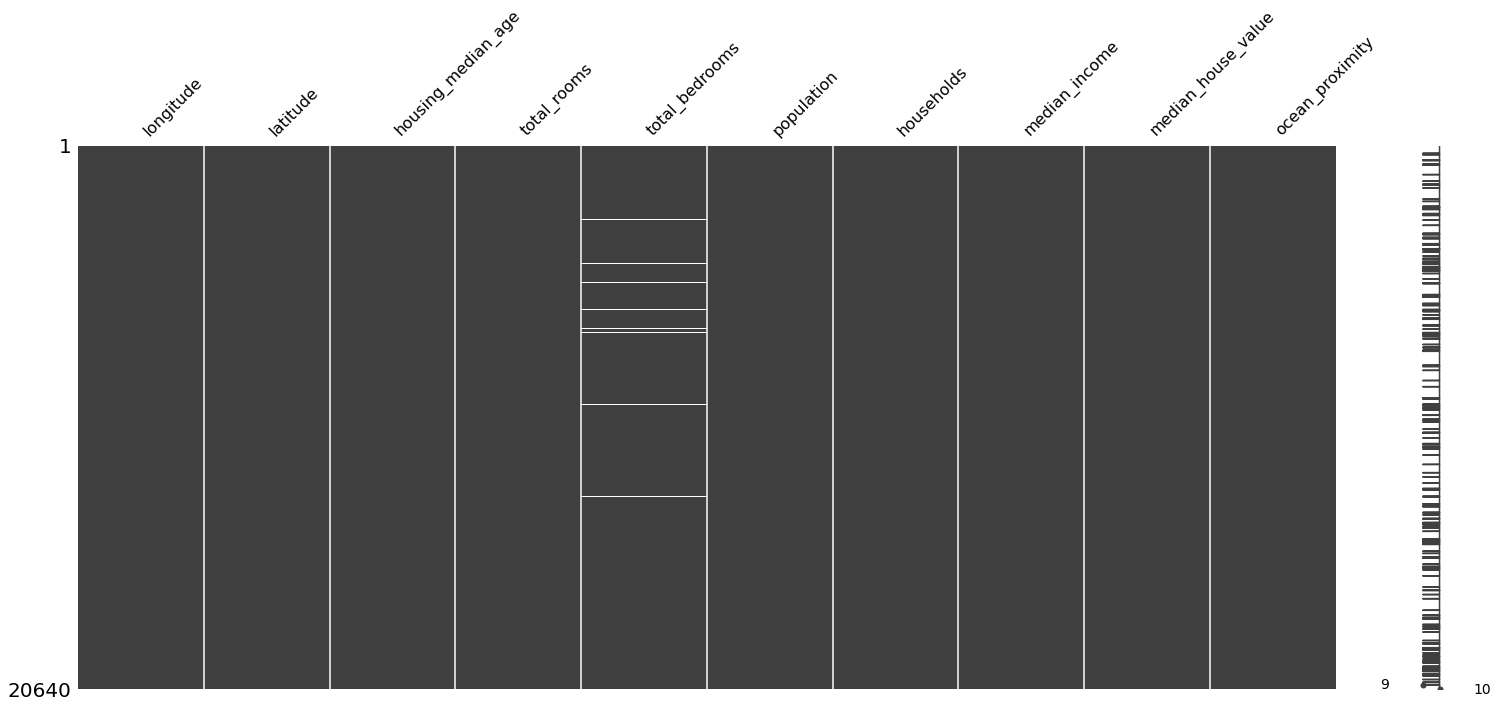

In [37]:
# 결측값 흰색으로 비어있음 
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

msno.matrix(data)
plt.show()

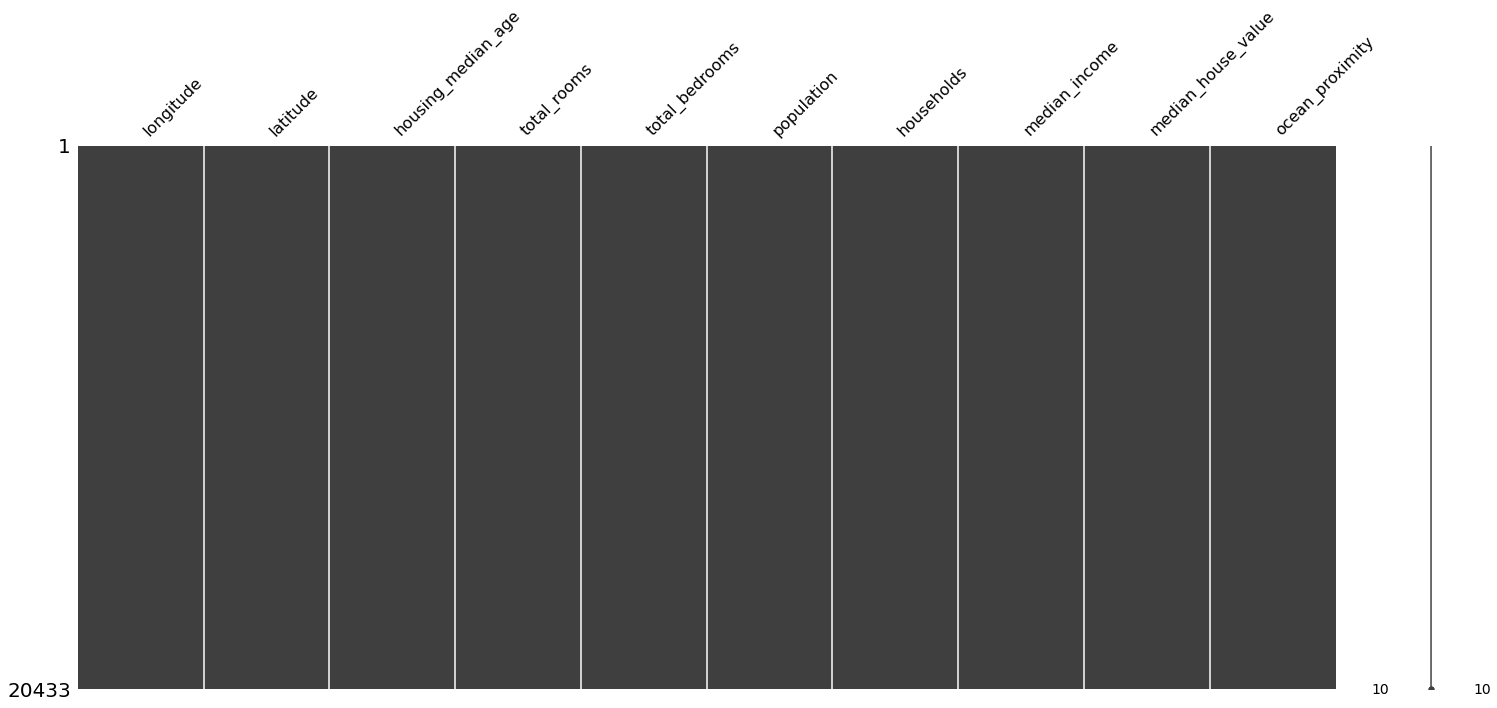

In [38]:
# 1. 결측된 데이터가 너무 많은 경우 해당 열 전체 삭제
data1 = data.dropna()

msno.matrix(data1)
plt.show()

In [39]:

# 2. 결측된 데이터가 일부일 경우 그럴듯한 값으로 대체하기
# sklearn.SimpleImputer(mean, median, most_frequent)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy  = 'most_frequent')
data = pd.DataFrame(imputer.fit_transform(data))
data

,0,1,2,3,4,5,6,7,8,9
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485,1007,433,1.7,92300,INLAND
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700,INLAND


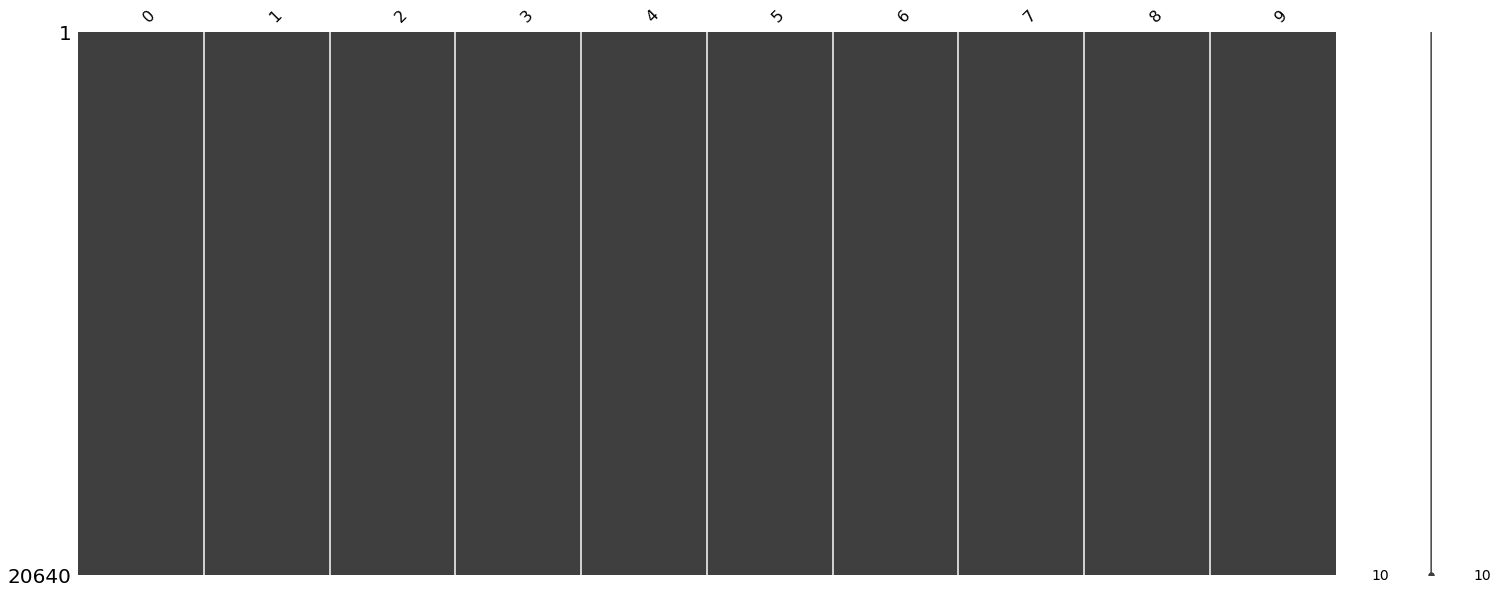

In [40]:
msno.matrix(data)
plt.show()

3. LabelEncoder

In [41]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

y

array([['NEAR BAY'],
       ['NEAR BAY'],
       ['NEAR BAY'],
       ...,
       ['INLAND'],
       ['INLAND'],
       ['INLAND']], dtype=object)

In [42]:
data.columns= [['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']]

In [43]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


In [44]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
labels = encoder.transform(y)
data = data.drop('ocean_proximity', axis=1)
data['ocean'] = labels

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [45]:
data.tail()
data.values[:,:-1]

array([[-122.23, 37.88, 41.0, ..., 126.0, 8.3252, 452600.0],
       [-122.22, 37.86, 21.0, ..., 1138.0, 8.3014, 358500.0],
       [-122.24, 37.85, 52.0, ..., 177.0, 7.2574, 352100.0],
       ...,
       [-121.22, 39.43, 17.0, ..., 433.0, 1.7, 92300.0],
       [-121.32, 39.43, 18.0, ..., 349.0, 1.8672, 84700.0],
       [-121.24, 39.37, 16.0, ..., 530.0, 2.3886, 89400.0]], dtype=object)

4. Data preprocessing

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler.fit(data.values[:,:-1])
df = scaler.transform(data.values[:,:-1])

In [52]:
df = pd.DataFrame(df)
df['9'] = labels
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.327835,1.052548,0.982143,-0.804819,-0.967245,-0.974429,-0.977033,2.344766,2.129631,3
1,-1.322844,1.043185,-0.607019,2.045890,1.358707,0.861439,1.669961,2.332238,1.314156,3
2,-1.332827,1.038503,1.856182,-0.535746,-0.822021,-0.820777,-0.843637,1.782699,1.258693,3
3,-1.337818,1.038503,1.856182,-0.624215,-0.714889,-0.766028,-0.733781,0.932968,1.165100,3
4,-1.337818,1.038503,1.856182,-0.462404,-0.607758,-0.759847,-0.629157,-0.012881,1.172900,3


4. To Model use Pytorch

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [55]:
data = torch.from_numpy(df.values).float()

data.shape

torch.Size([20640, 10])

In [56]:
x = data[:, :-1]
y = data[:, -1:]

print(x.shape, y.shape)
print(x.size(0))

torch.Size([20640, 9]) torch.Size([20640, 1])
20640


In [57]:
n_epochs = 4000
batch_size = 256
print_interval = 200
#learning_rate = 1e-2

In [58]:
# Build Model

model = nn.Sequential(
    nn.Linear(x.size(-1), 6), # 8->6
    nn.LeakyReLU(),
    nn.Linear(6, 5),
    nn.LeakyReLU(),
    nn.Linear(5, 4),
    nn.LeakyReLU(),
    nn.Linear(4, 3),
    nn.LeakyReLU(),
    nn.Linear(3, y.size(-1)),

)

model

optimizer = optim.Adam(model.parameters())

In [59]:
# |x| = (total_size, input_dim)
# |y| = (total_size, output_dim)


for i in range(n_epochs) :
  # shuffle the index to feed-forward.
  # 20640개 데이터 셔플링해서 랜덤하게 새로 인덱스 설정해주기 
  indices = torch.randperm(x.size(0)) #x.size(0) = 20640
  x_ = torch.index_select(x, dim=0, index=indices)
  y_ = torch.index_select(y, dim=0, index=indices)

  x_ = x_.split(batch_size, dim=0)
  y_ = y_.split(batch_size, dim=0)
  # |x_[i]| = (batch_size, input_dim)
  # |y_[i]| = (batch_size, output_dim)

  y_hat = []
  total_loss = 0

  for x_i, y_i in zip(x_, y_):
    y_hat_i = model(x_i)
    loss = F.mse_loss(y_hat_i, y_i)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    total_loss += float(loss) #this is very important to prevent memory leark.
    y_hat += [y_hat_i]

  total_loss = total_loss / len(x_)
  if (i + 1) % print_interval == 0:
    print('Epoch %d : loss=%.4e' % (i+1, total_loss))

y_hat = torch.cat(y_hat, dim=0)
y = torch.cat(y_, dim=0)



Epoch 200 : loss=6.2918e-01
Epoch 400 : loss=5.6427e-01
Epoch 600 : loss=5.3769e-01
Epoch 800 : loss=5.2961e-01
Epoch 1000 : loss=5.2224e-01
Epoch 1200 : loss=5.2523e-01
Epoch 1400 : loss=5.0996e-01
Epoch 1600 : loss=5.1585e-01
Epoch 1800 : loss=5.0311e-01
Epoch 2000 : loss=5.0586e-01
Epoch 2200 : loss=4.9662e-01
Epoch 2400 : loss=5.0468e-01
Epoch 2600 : loss=5.0613e-01
Epoch 2800 : loss=5.0363e-01
Epoch 3000 : loss=4.9539e-01
Epoch 3200 : loss=4.9769e-01
Epoch 3400 : loss=4.9808e-01
Epoch 3600 : loss=4.9858e-01
Epoch 3800 : loss=4.9331e-01
Epoch 4000 : loss=4.9789e-01


Let's see the result!

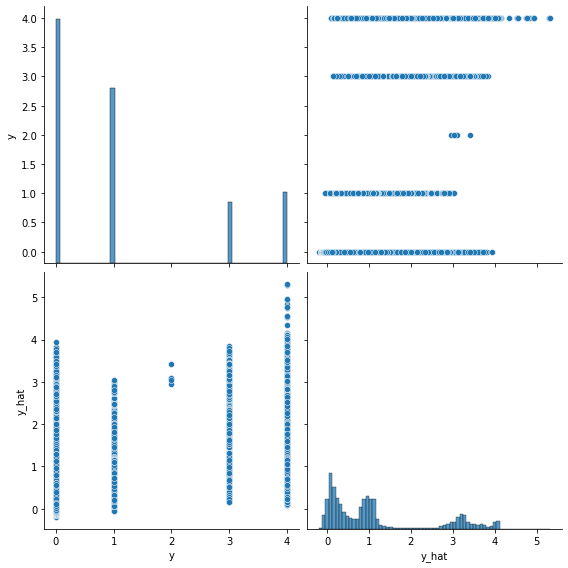

In [62]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=["y", "y_hat"])

sns.pairplot(df, height=4)
plt.show()

# 5가 잘 예측되지 않음을 확인할 수 있다.

5. reference

* Missing value : https://continuous-development.tistory.com/165

* LabelEncoder : https://nicola-ml.tistory.com/62